In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
targets_per_word = pd.DataFrame(columns = [0,1])

In [4]:
for value in df_train.keyword.value_counts(dropna=False).keys():
    if pd.isna(value):
        target = df_train[df_train.keyword.isna()].target.value_counts(dropna=False)
        df_target = pd.DataFrame(dict(target), index = ["Não especificado"])
    else:
        target = df_train[df_train.keyword == value].target.value_counts()
        df_target = pd.DataFrame(dict(target), index = [value])
        n_location = len(df_train[df_train.keyword == value].location.value_counts().values)
        max_location = df_train[df_train.keyword == value].location.value_counts().values.max()
        if max_location > n_location:
            print("Localização importante")
            print(df_train[df_train.keyword == value].location.value_counts())
    targets_per_word = targets_per_word.append(df_target)

Localização importante
USA                            17
United States                   4
Tractor land aka Bristol        1
Hamilton County, IN             1
In your head                    1
hkXfYMhEx                       1
North Carolina, USA             1
Dakar                           1
Scituate, MA                    1
WA State                        1
The Sanctuary Network, Rome     1
US                              1
Name: location, dtype: int64
Localização importante
Kenya                             16
im definitely taller than you.     1
{Detailed}                         1
Why should you know?               1
Aperture Science Test Facility     1
Philadelphia, PA                   1
Photo : Blue Mountains             1
Wandsworth, London                 1
london essex england uk            1
English Midlands                   1
Bedford, England                   1
Fairgrounds Resident               1
Name: location, dtype: int64
Localização importante
New York             

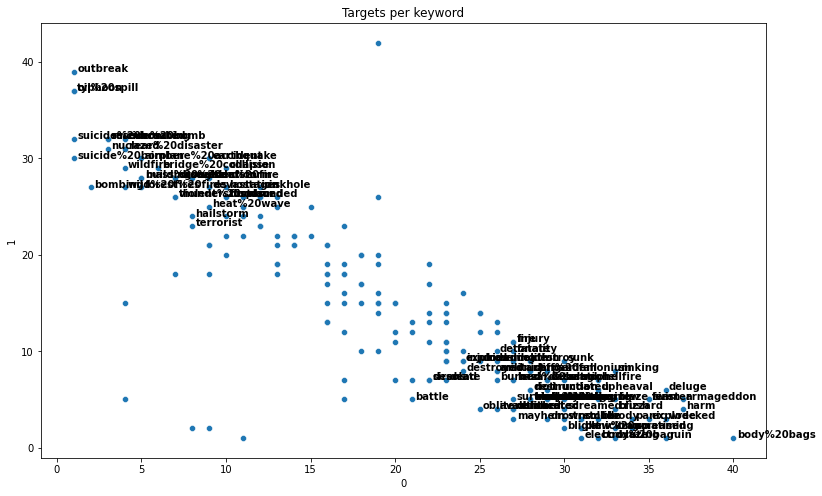

In [5]:
targets_per_word = targets_per_word.rename(columns = {0:"0", 1:"1"})
plt.figure(figsize=(13,8))
sns.scatterplot(data=targets_per_word,x="0",y="1")
plt.title("Targets per keyword") #title
plt.xlabel("0") #x label
plt.ylabel("1") #y label
for line in range(1,targets_per_word.shape[0]):
    if statistics.stdev([targets_per_word["0"][line], targets_per_word["1"][line]]) >10:
        plt.text(targets_per_word["0"][line]+0.2, targets_per_word["1"][line], targets_per_word.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()